In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt

from time import time

import itertools
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

In [14]:

def classify(clf,X_train,y_train,X_test,y_test):
    #train the model
    t0 = time()
    print("start fit")
    clf.fit(X_train,y_train)
    print ("Training time:", round(time()-t0, 3), "s")

    #test the model

    pred=clf.predict(X_test)
    print(accuracy_score(y_test, pred))

    print(classification_report(y_test, pred))
    
    
 

In [15]:
def plot_validation(train_scores, test_scores,param_range,cl_name,param_name):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    fig= plt.figure(figsize=(10.24,5.12),dpi=100)

    plt.title("Validation Curve with _"+cl_name)

    plt.xlabel("param _"+param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)



    

    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    
    plt.legend(loc="best")
    #plt.xticks(param_range)
    #plt.tick_params(labelbottom='off')    

    fig.savefig(cl_name+"_"+param_name+".png",dpi=fig.dpi)

    plt.show()
    

In [5]:
#read  and normalize the data

def data():
    X_train=np.genfromtxt('data/X_train.txt',dtype='float')
    X_test=np.genfromtxt('data/X_test.txt',dtype='float')
    y_train=np.genfromtxt('data/y_train.txt',dtype='float')
    y_test=np.genfromtxt('data/y_test.txt',dtype='float')
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return  X_train,y_train,X_test,y_test




In [17]:

def add_bias(X_train,X_test):
    ones=np.ones(shape=(X_train.shape[0],1))
    X_train=np.append(X_train, ones, axis=1)
    ones=np.ones(shape=(X_test.shape[0],1))
    X_test=np.append(X_test, ones, axis=1)
    return X_train,X_test


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


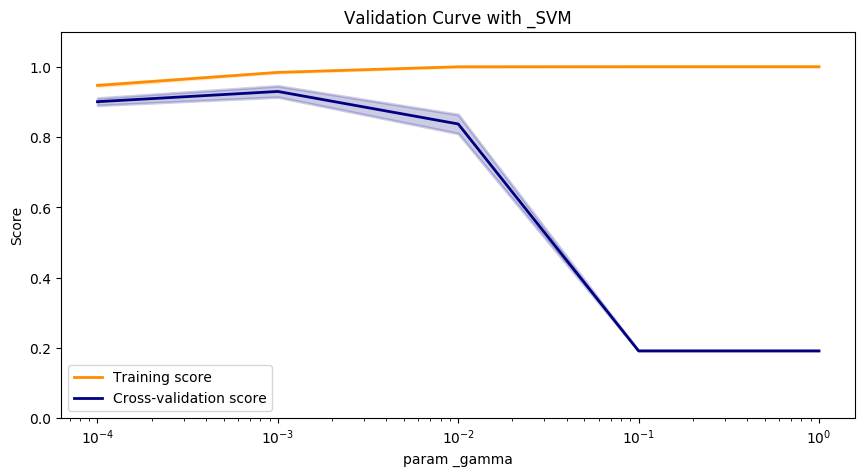

             precision    recall  f1-score   support

        1.0       0.96      0.97      0.97       496
        2.0       0.93      0.97      0.95       471
        3.0       0.98      0.92      0.95       420
        4.0       0.94      0.90      0.92       491
        5.0       0.92      0.95      0.93       532
        6.0       1.00      1.00      1.00       537

avg / total       0.95      0.95      0.95      2947



In [42]:

#find optimal vlaue for gamma paramter for svm classifer
X_train,y_train,X_test,y_test=data()
svm=SVC(random_state=101)

param_range_gamma = [1,0.1,0.01,0.001,0.0001]
train_scores, valid_scores =validation_curve(svm,
                                             X_train,y_train,
                                             'gamma',
                                             param_range_gamma,cv=3,
                                             verbose=True,n_jobs=-1)

plot_validation(train_scores,valid_scores,param_range_gamma,"SVM","gamma")


classify(svm,X_train,y_train,X_test,y_test)


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   41.6s finished


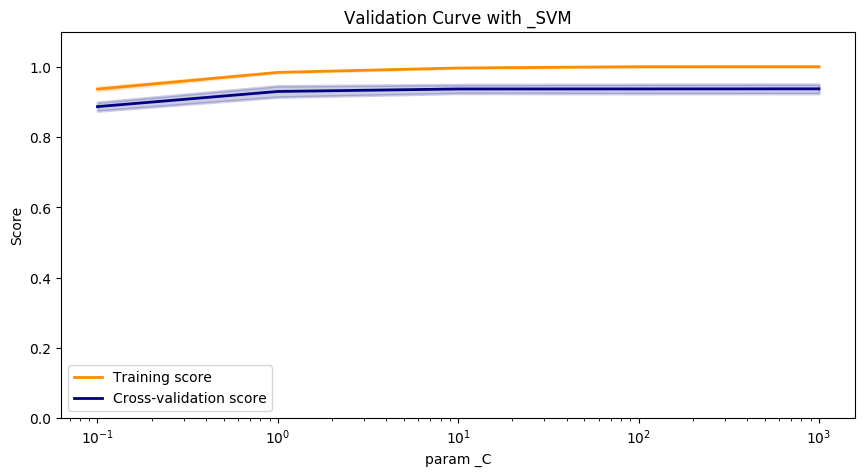

             precision    recall  f1-score   support

        1.0       0.95      0.98      0.97       496
        2.0       0.92      0.96      0.94       471
        3.0       0.99      0.90      0.94       420
        4.0       0.93      0.89      0.91       491
        5.0       0.91      0.94      0.92       532
        6.0       1.00      1.00      1.00       537

avg / total       0.95      0.95      0.95      2947



In [44]:
# find optimal value for C paramter for svm classifrer
#best gamma 10-3=0.001 bec validaiton scrore starts decreasing
X_train,y_train,X_test,y_test=data()
svm=SVC(random_state=101,gamma=0.001)

param_range_C = [0.1,1,10,100,1000]
train_scores, valid_scores =validation_curve(svm,
                                             X_train,y_train,
                                            'C',
                                             param_range_C,cv=3,
                                             verbose=True,n_jobs=-1)

plot_validation(train_scores,valid_scores,param_range_C,'SVM','C')


classify(svm,X_train,y_train,X_test,y_test)



In [18]:
#best c is 103 (1000) becuase train and valid is the same
#optimal svm clasisfar with best gamma and c
svm=SVC(random_state=101,gamma=0.001,C=1000)
X_train,y_train,X_test,y_test=data()
classify(svm,X_train,y_train,X_test,y_test)

start fit
Training time: 3.499 s
0.959280624364
             precision    recall  f1-score   support

        1.0       0.96      0.98      0.97       496
        2.0       0.93      0.96      0.95       471
        3.0       0.98      0.93      0.95       420
        4.0       0.98      0.90      0.93       491
        5.0       0.92      0.98      0.95       532
        6.0       1.00      1.00      1.00       537

avg / total       0.96      0.96      0.96      2947



In [54]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=5)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
svm=SVC(random_state=101,gamma=0.001,C=1000)
classify(svm,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.77      0.93      0.84       496
        2.0       0.83      0.82      0.83       471
        3.0       0.73      0.56      0.63       420
        4.0       0.75      0.56      0.64       491
        5.0       0.69      0.91      0.78       532
        6.0       1.00      0.93      0.96       537

avg / total       0.80      0.79      0.79      2947



In [58]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=50)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
svm=SVC(random_state=101,gamma=0.001,C=1000)
classify(svm,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.93      0.91      0.92       496
        2.0       0.86      0.90      0.88       471
        3.0       0.90      0.89      0.90       420
        4.0       0.93      0.89      0.91       491
        5.0       0.91      0.94      0.92       532
        6.0       1.00      1.00      1.00       537

avg / total       0.92      0.92      0.92      2947



In [59]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=200)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
svm=SVC(random_state=101,gamma=0.001,C=1000)
classify(svm,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.96      0.99      0.97       496
        2.0       0.97      0.96      0.96       471
        3.0       0.99      0.96      0.98       420
        4.0       0.97      0.88      0.92       491
        5.0       0.90      0.98      0.94       532
        6.0       1.00      1.00      1.00       537

avg / total       0.96      0.96      0.96      2947



In [60]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=500)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
svm=SVC(random_state=101,gamma=0.001,C=1000)
classify(svm,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.96      0.99      0.98       496
        2.0       0.97      0.96      0.97       471
        3.0       0.99      0.97      0.98       420
        4.0       0.97      0.89      0.93       491
        5.0       0.91      0.98      0.94       532
        6.0       1.00      1.00      1.00       537

avg / total       0.97      0.97      0.97      2947



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.6min finished


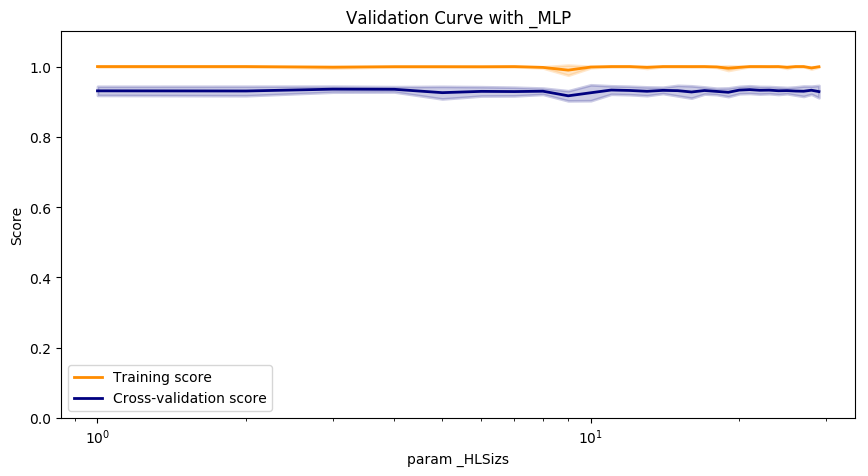

             precision    recall  f1-score   support

        1.0       0.96      0.99      0.97       496
        2.0       0.93      0.95      0.94       471
        3.0       0.97      0.91      0.94       420
        4.0       0.96      0.88      0.92       491
        5.0       0.87      0.97      0.91       532
        6.0       1.00      0.96      0.98       537

avg / total       0.95      0.95      0.95      2947



In [6]:

#find optimial hidden layer sizes
X_train,y_train,X_test,y_test=data()
#addbias
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101)
#30 possible values
param_range_HL = [x for x in itertools.product((300,400,500,600,700),repeat=1)]+[x for x in itertools.product((300,400,500,600,700),repeat=2)]

train_scores, valid_scores =validation_curve(mlp,
                                             X_train,y_train,
                                            'hidden_layer_sizes',
                                             param_range_HL,cv=3,
                                             verbose=True,n_jobs=-1)

param_range_HL=np.arange(0,30)
plot_validation(train_scores,valid_scores,param_range_HL,'MLP','HLSizs')
classify(mlp,X_train,y_train,X_test,y_test)


In [106]:
train_scores = [[1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.], [1., 1., 1.],
                [1., 0.99755102, 1.], [1., 0.99816327, 0.99959217], [1., 1., 1.], [0.99979592, 1., 1.],
                [1., 1., 0.99918434], [1., 1., 1.], [0.99938776, 1., 1.], [0.99714286, 1., 1.], [1., 1., 1.],
                [1., 1., 1.], [0.99836735, 0.99897959, 1.], [1., 1., 0.99938825], [1., 1., 0.99775693],
                [0.95938776, 1., 1.], [0.9944898, 1., 1.], [0.99306122, 1., 1.], [1., 1., 1.], [1., 1., 1.],
                [1., 1., 0.99816476], [1., 1., 1.], [1., 0.99857143, 1.], [1., 1., 0.99694127],
                [0.99673469, 1., 1.], [0.99326531, 0.99897959, 1.]]

valid_scores = [[0.94045677, 0.91313214, 0.94607843]
    , [0.94127243, 0.90946166, 0.94281046]
    , [0.94127243, 0.91517129, 0.94485294]
    , [0.94412724, 0.91272431, 0.94281046]
    , [0.94127243, 0.90660685, 0.94035948]
    , [0.94249592, 0.91027732, 0.93954248]
    , [0.94208809, 0.89396411, 0.93995098]
    , [0.93800979, 0.90130506, 0.94035948]
    , [0.94453507, 0.91639478, 0.94444444]
    , [0.93841762, 0.91190865, 0.94035948]
    , [0.93719413, 0.91190865, 0.94362745]
    , [0.94249592, 0.91353997, 0.94444444]
    , [0.93760196, 0.92006525, 0.94403595]
    , [0.93637847, 0.91027732, 0.94281046]
    , [0.93882545, 0.90497553, 0.94566993]
    , [0.94127243, 0.91435563, 0.94362745]
    , [0.93760196, 0.90660685, 0.94281046]
    , [0.94127243, 0.91598695, 0.94485294]
    , [0.93964111, 0.91843393, 0.93259804]
    , [0.91884176, 0.91680261, 0.94076797]
    , [0.93923328, 0.91353997, 0.94199346]
    , [0.92985318, 0.91190865, 0.93831699]
    , [0.93800979, 0.91965742, 0.94117647]
    , [0.93841762, 0.91190865, 0.93831699]
    , [0.93515498, 0.91272431, 0.94199346]
    , [0.93964111, 0.91068515, 0.93872549]
    , [0.9449429, 0.91965742, 0.94158497]
    , [0.94168026, 0.91476346, 0.93218954]
    , [0.93026101, 0.91557912, 0.93668301]
    , [0.9233279, 0.91598695, 0.94035948]]

param_range_HL=np.arange(1,31)
param_range_HL=np.power(2, param_range_HL)
plot_validation(train_scores,valid_scores,param_range_HL,'MLP','Hidden_layer_sizes')
param_range_HL = [x for x in itertools.product((300,400,500,600,700),repeat=1)]+[x for x in itertools.product((300,400,500,600,700),repeat=2)]
print(param_range_HL[4])
print(param_range_HL[7])

(700,)
(300, 500)


In [ ]:
#find optimial alpha
X_train,y_train,X_test,y_test=data()
#addbias
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,))
param_range_alpha = [0.00001,0.001,0.1,1,10]

train_scores, valid_scores =validation_curve(mlp,
                                             X_train,y_train,
                                            'alpha',
                                             param_range_alpha,cv=3,
                                             verbose=True,n_jobs=-1)

plot_validation(train_scores,valid_scores,param_range_alpha,'MLP','alpha700')
classify(mlp,X_train,y_train,X_test,y_test)
#{'alpha': 1}

In [19]:
X_train,y_train,X_test,y_test=data()
#addbias
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,),alpha=1)
classify(mlp,X_train,y_train,X_test,y_test)

start fit
Training time: 15.684 s
0.953851374279
             precision    recall  f1-score   support

        1.0       0.98      0.97      0.98       496
        2.0       0.95      0.98      0.97       471
        3.0       0.96      0.95      0.95       420
        4.0       0.96      0.89      0.92       491
        5.0       0.88      0.96      0.92       532
        6.0       1.00      0.97      0.98       537

avg / total       0.96      0.95      0.95      2947



In [7]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=5)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,),alpha=1)
classify(mlp,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.76      0.96      0.85       496
        2.0       0.81      0.84      0.83       471
        3.0       0.78      0.52      0.62       420
        4.0       0.75      0.59      0.66       491
        5.0       0.71      0.89      0.79       532
        6.0       1.00      0.93      0.96       537

avg / total       0.80      0.80      0.79      2947



In [8]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=50)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,),alpha=1)
classify(mlp,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.91      0.96      0.93       496
        2.0       0.88      0.91      0.90       471
        3.0       0.95      0.86      0.91       420
        4.0       0.86      0.87      0.86       491
        5.0       0.88      0.90      0.89       532
        6.0       1.00      0.97      0.98       537

avg / total       0.92      0.91      0.91      2947



In [9]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=200)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,),alpha=1)
classify(mlp,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.95      0.97      0.96       496
        2.0       0.96      0.93      0.94       471
        3.0       0.96      0.97      0.96       420
        4.0       0.97      0.88      0.92       491
        5.0       0.86      0.97      0.91       532
        6.0       1.00      0.96      0.98       537

avg / total       0.95      0.95      0.95      2947



In [10]:
X_train,y_train,X_test,y_test=data()
pca= PCA(n_components=500)
pca=pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
X_train,X_test=add_bias(X_train,X_test)
mlp = MLPClassifier(random_state=101,hidden_layer_sizes=(700,),alpha=1)
classify(mlp,X_train,y_train,X_test,y_test)

             precision    recall  f1-score   support

        1.0       0.94      0.99      0.97       496
        2.0       0.94      0.95      0.95       471
        3.0       0.98      0.91      0.94       420
        4.0       0.96      0.90      0.93       491
        5.0       0.89      0.97      0.93       532
        6.0       1.00      0.96      0.98       537

avg / total       0.95      0.95      0.95      2947

